# importing libraries 

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 

from sklearn.utils import shuffle

import re
import nltk
nltk.download('stopwords')
import time
import warnings
warnings.filterwarnings("ignore")
from nltk.corpus import stopwords
from nltk.stem import LancasterStemmer

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

import keras 
from keras.models import Sequential, Model 
from keras import layers
from keras.layers import Dense, Dropout, Input, Embedding

[nltk_data] Downloading package stopwords to C:\Users\ahmed
[nltk_data]     hatem\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [2]:
def preprocess_text(text):
    review = re.sub('[^a-zA-Z]',' ',text) 
    review = review.lower()
    review = review.split()
    ps = LancasterStemmer()
    all_stopwords = stopwords.words('english')
    all_stopwords.remove('not')
    review = [ps.stem(word) for word in review if not word in set(all_stopwords)]
    return ' '.join(review)

In [3]:
def applying_preprocesing_to_text(dataset,column_name):
    dataset[column_name] = dataset[column_name].apply(lambda x: preprocess_text(x))
    return dataset

In [4]:
def label_preprocessing(dataset,test_column):
    y = dataset[test_column].replace(4,1)
    le = LabelEncoder()
    y = le.fit_transform(y)
    return y

In [5]:
dataset_cols = ["target", "ids", "date", "flag", "user", "text"]
dataset = pd.read_csv(r'C:\Users\ahmed hatem\Downloads\archive (2)\training.1600000.processed.noemoticon.csv',header=None,  encoding='ISO-8859-1',names=dataset_cols)

In [6]:
dataset

,target,ids,date,flag,user,text
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
2,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
3,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
4,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."
...,...,...,...,...,...,...
1599995,4,2193601966,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,AmandaMarie1028,Just woke up. Having no school is the best fee...
1599996,4,2193601969,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,TheWDBoards,TheWDB.com - Very cool to hear old Walt interv...
1599997,4,2193601991,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,bpbabe,Are you ready for your MoJo Makeover? Ask me f...
1599998,4,2193602064,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,tinydiamondz,Happy 38th Birthday to my boo of alll time!!! ...


In [7]:
dataset=applying_preprocesing_to_text(dataset,'text')

# shuffling data 

In [8]:
dataset = shuffle(dataset,random_state=42)

In [9]:
y=label_preprocessing(dataset,'target')

# no need for sampling as both categories are equal

In [10]:
np.bincount(y)

array([800000, 800000], dtype=int64)

In [11]:
X_train, X_test, y_train, y_test = train_test_split(dataset['text'], y, test_size = 0.15, random_state = 0)

In [12]:
tfidf = TfidfVectorizer(max_features = 600)
X_train_tf = tfidf.fit_transform(X_train).toarray()
X_test_tf = tfidf.transform(X_test).toarray()
X_train_tf.shape, X_test_tf.shape, y_train.shape, y_test.shape

((1360000, 600), (240000, 600), (1360000,), (240000,))

In [13]:
def model1(input_dim):
    model = Sequential()
    model.add(Dense(128, activation='relu', input_dim=input_dim))
    model.add(Dense(128, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(64, activation='relu'))
    model.add(Dense(12, input_dim=8, activation='relu'))
    model.add(Dense(8, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(1, activation='sigmoid'))
    model.compile(optimizer='adam',
                  loss='binary_crossentropy',
                  metrics=['accuracy'])
    return model


In [14]:
model=model1(600)
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 128)               76928     
_________________________________________________________________
dense_1 (Dense)              (None, 128)               16512     
_________________________________________________________________
dropout (Dropout)            (None, 128)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 64)                8256      
_________________________________________________________________
dense_3 (Dense)              (None, 12)                780       
_________________________________________________________________
dense_4 (Dense)              (None, 8)                 104       
_________________________________________________________________
dropout_1 (Dropout)          (None, 8)                 0

In [15]:
history = model.fit(X_train_tf, y_train, epochs=50,batch_size=32, validation_data=(X_test_tf,y_test))
loss, accuracy = model.evaluate(X_train_tf, y_train, verbose=False)
print("Training Accuracy: {:.4f}".format(accuracy))
loss, accuracy = model.evaluate(X_test_tf, y_test, verbose=False)
print("Testing Accuracy:  {:.4f}".format(accuracy))

Epoch 1/50
42500/42500 [==============================] - 33s 762us/step - loss: 0.5492 - accuracy: 0.7236 - val_loss: 0.5122 - val_accuracy: 0.7448
Epoch 2/50
42500/42500 [==============================] - 32s 752us/step - loss: 0.5366 - accuracy: 0.7330 - val_loss: 0.5068 - val_accuracy: 0.7486
Epoch 3/50
42500/42500 [==============================] - 32s 757us/step - loss: 0.5308 - accuracy: 0.7376 - val_loss: 0.5063 - val_accuracy: 0.7502
Epoch 4/50
42500/42500 [==============================] - 32s 763us/step - loss: 0.5268 - accuracy: 0.7406 - val_loss: 0.5043 - val_accuracy: 0.7504
Epoch 5/50
42500/42500 [==============================] - 32s 763us/step - loss: 0.5228 - accuracy: 0.7448 - val_loss: 0.5012 - val_accuracy: 0.7501
Epoch 6/50
42500/42500 [==============================] - 33s 784us/step - loss: 0.5177 - accuracy: 0.7510 - val_loss: 0.5017 - val_accuracy: 0.7509
Epoch 7/50
42500/42500 [==============================] - 34s 796us/step - loss: 0.5156 - accuracy: 0.7529

<Figure size 7200x4800 with 0 Axes>

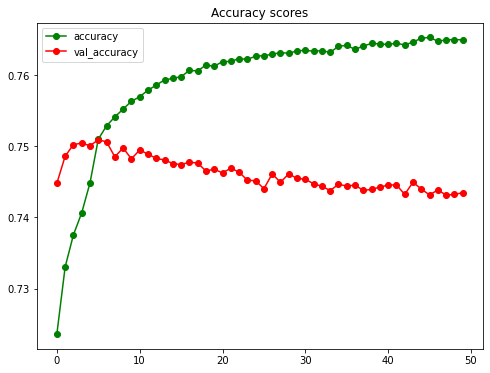

<Figure size 432x288 with 0 Axes>

In [16]:
import matplotlib.pyplot as plt 
plt.figure(dpi=1200)
plt.figure(figsize=(8,6))
plt.title('Accuracy scores')
plt.plot(history.history['accuracy'],'go-')
plt.plot(history.history['val_accuracy'],'ro-')
plt.legend(['accuracy', 'val_accuracy'])
plt.show()
plt.savefig("acc.png",dpi=1500)


<Figure size 7200x4800 with 0 Axes>

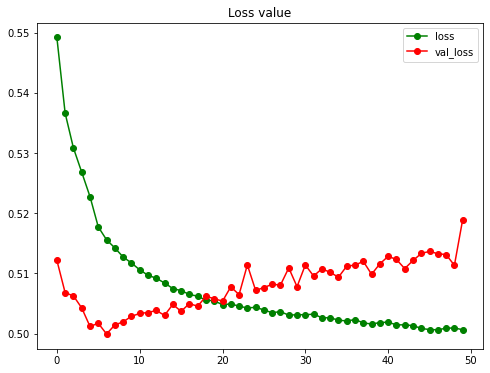

<Figure size 432x288 with 0 Axes>

In [17]:
plt.figure(dpi=1200)
plt.figure(figsize=(8,6))
plt.title('Loss value')
plt.plot(history.history['loss'],'go-')
plt.plot(history.history['val_loss'],'ro-')
plt.legend(['loss', 'val_loss'])
plt.show()
plt.savefig("loss.png",dpi=1500)


In [18]:
dataset = pd.read_csv(r'C:\Users\ahmed hatem\Downloads\live twiiter data\live tweets for testing_cleaned.csv',  encoding='ISO-8859-1')

In [19]:
dataset

,Unnamed: 0,Unnamed: 0.1,Tweets
0,0,0,"lionel messi has gone past days (, mins) wi..."
1,1,1,"lionel messi has gone past days (, mins) wi..."
2,2,2,cristiano ronaldo since joining man utd: g...
3,3,3,"lionel messi has gone past days (, mins) wi..."
4,4,4,"lionel messi has gone past days (, mins) wi..."
...,...,...,...
995,995,995,lionel messi substituted on home debut as pari...
996,996,996,lionel messi substituted on home debut as pari...
997,997,997,"lionel messi has gone past days (, mins) wi..."
998,998,998,lionel messi was involved in shots against l...


In [20]:
dataset=applying_preprocesing_to_text(dataset,'Tweets')

In [21]:
dataset=dataset.drop(['Unnamed: 0','Unnamed: 0.1'],axis=1)

In [22]:
dataset

,Tweets
0,lionel mess gon past day min without scor club...
1,lionel mess gon past day min without scor club...
2,cristiano ronaldo sint join man utd gam goal l...
3,lionel mess gon past day min without scor club...
4,lionel mess gon past day min without scor club...
...,...
995,lionel mess substitut hom debut par saint germ...
996,lionel mess substitut hom debut par saint germ...
997,lionel mess gon past day min without scor club...
998,lionel mess involv shot lyon attempt chant cre...


In [23]:
max_features=168
tfidf = TfidfVectorizer(max_features = max_features)
X_train_tf = tfidf.fit_transform(dataset['Tweets']).toarray()

In [24]:
model=model1(max_features)

In [25]:
X_train_tf.shape


(1000, 168)

In [26]:
x=model.predict(X_train_tf)

In [27]:
x

array([[0.4987953 ],
       [0.4987953 ],
       [0.50948286],
       [0.4987953 ],
       [0.4987953 ],
       [0.4987953 ],
       [0.4987953 ],
       [0.4987953 ],
       [0.50948286],
       [0.5098831 ],
       [0.50228447],
       [0.50948286],
       [0.50948286],
       [0.50228447],
       [0.5061738 ],
       [0.50948286],
       [0.50948286],
       [0.5132474 ],
       [0.50948286],
       [0.50948286],
       [0.50948286],
       [0.51557535],
       [0.4987953 ],
       [0.50228447],
       [0.50948286],
       [0.50914943],
       [0.50948286],
       [0.5111374 ],
       [0.4987953 ],
       [0.50948286],
       [0.50948286],
       [0.4987953 ],
       [0.5       ],
       [0.50948286],
       [0.50948286],
       [0.4987953 ],
       [0.50228447],
       [0.50299877],
       [0.51189864],
       [0.50948286],
       [0.50948286],
       [0.4987953 ],
       [0.4987953 ],
       [0.50948286],
       [0.510583  ],
       [0.4987953 ],
       [0.50228447],
       [0.509